# LOAD MODEL CLIP

In [6]:
import torch
import clip
from PIL import Image

# chọn device: GPU nếu có
device = "cuda" if torch.cuda.is_available() else "cpu"

# load model + preprocess
model, preprocess = clip.load("ViT-B/32", device=device)

ModuleNotFoundError: No module named 'torch'

# PREPARE DATA

## Load image

In [2]:
import os

In [3]:


path_keyframe = "/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe"
images = []

for keyframes in sorted(os.listdir(path_keyframe)):
    keyframes_path = os.path.join(path_keyframe, keyframes)
    if not os.path.isdir(keyframes_path):  # bỏ qua file
        continue

    for video_name in sorted(os.listdir(keyframes_path)):
        video_path = os.path.join(keyframes_path, video_name)
        if not os.path.isdir(video_path):  # bỏ qua file
            continue

        # sort file theo số trong tên (loại bỏ .DS_Store nếu nó lọt vào)
        files = [f for f in os.listdir(video_path) if f.lower().endswith((".jpg", ".png"))]
        files = sorted(files, key=lambda x: int(os.path.splitext(x)[0]))

        for file in files:
            images.append(os.path.join(video_path, file))

print(len(images), "images collected")
images

177321 images collected


['/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/001.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/002.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/003.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/004.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/005.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/006.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/007.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/008.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/009.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/010.jpg',
 '/Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/Keyframes_L21/L21_V001/011.jpg',
 '/Users/doanlong/Desktop/AIC/AI

## Load image index

In [4]:
import os
import pandas as pd

img_index = []
path_mapkf = "/Users/doanlong/Desktop/AIC/AIC_sample_data/map-keyframes"

for csv_file in sorted(os.listdir(path_mapkf)):
    if not csv_file.endswith(".csv"):
        continue  # bỏ qua file không phải CSV

    file_path = os.path.join(path_mapkf, csv_file)

    try:
        df = pd.read_csv(file_path, encoding="utf-8")
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding="latin1")

    # bỏ qua file rỗng hoặc không có cột
    if df.empty or "frame_idx" not in df.columns:
        print(f"⚠️ Bỏ qua file {csv_file} (rỗng hoặc thiếu cột).")
        continue

    img_index.extend(df["frame_idx"].tolist())

print(f"Tổng số frame_idx thu được: {len(img_index)}")
img_index


Tổng số frame_idx thu được: 177321


[0,
 90,
 261,
 351,
 411,
 531,
 711,
 858,
 921,
 1131,
 1281,
 1371,
 1551,
 1761,
 1887,
 2036,
 2130,
 2217,
 2288,
 2375,
 2412,
 2574,
 2720,
 2766,
 2856,
 2958,
 3150,
 3243,
 3348,
 3507,
 3584,
 3599,
 3738,
 3782,
 3932,
 4037,
 4157,
 4184,
 4308,
 4428,
 4551,
 4686,
 4835,
 4932,
 4998,
 5082,
 5160,
 5370,
 5550,
 5760,
 5889,
 6099,
 6279,
 6386,
 6534,
 6674,
 6822,
 6933,
 7074,
 7202,
 7412,
 7622,
 7811,
 7923,
 8073,
 8268,
 8358,
 8456,
 8622,
 8730,
 8820,
 8973,
 9155,
 9351,
 9498,
 9708,
 9854,
 9987,
 10137,
 10224,
 10314,
 10355,
 10437,
 10502,
 10653,
 10698,
 10868,
 10908,
 11000,
 11195,
 11400,
 11501,
 11691,
 11781,
 11964,
 12171,
 12278,
 12335,
 12390,
 12450,
 12510,
 12528,
 12558,
 12600,
 12630,
 12818,
 12962,
 13071,
 13137,
 13347,
 13467,
 13631,
 13734,
 13892,
 14045,
 14124,
 14211,
 14361,
 14564,
 14622,
 14703,
 14792,
 14883,
 14975,
 15032,
 15065,
 15146,
 15186,
 15242,
 15330,
 15356,
 15566,
 15771,
 15863,
 16068,
 16184,
 1

## Preprocess data

In [5]:
import os
import numpy as np

clip_features_path = "/Users/doanlong/Desktop/AIC/AIC_sample_data/clip-features-32"
all_features = []

for npy_file in sorted(os.listdir(clip_features_path)):
    if npy_file.endswith(".npy"):  # chỉ load file .npy
        file_path = os.path.join(clip_features_path, npy_file)  # full path
        vector_feature = np.load(file_path)
        all_features.append(vector_feature)
        
image_features = torch.tensor(np.vstack(all_features)).to(device).float()
print(image_features.shape)  # (Tổng số frames, 512)
image_features

    

torch.Size([177321, 512])


tensor([[ 0.0295,  0.0307,  0.0399,  ...,  0.0622, -0.0597, -0.0008],
        [ 0.0023, -0.0202,  0.0057,  ...,  0.0961, -0.0150,  0.0261],
        [-0.0004, -0.0436, -0.0116,  ...,  0.1012, -0.0093,  0.0140],
        ...,
        [ 0.0007,  0.0044, -0.0205,  ..., -0.0092, -0.0577, -0.0484],
        [-0.0241,  0.0249, -0.0076,  ..., -0.0225, -0.0474, -0.0306],
        [-0.0112,  0.0164, -0.0007,  ...,  0.1014, -0.0140,  0.0081]])

# CALCULATE FEATURE

Top 5 ảnh khớp với mô tả 'a photo of cats, dogs, and a human a sitting on the chair':
#1: /Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/keyframes_L28/L28_V006/540.jpg | Score: 29.9880 | Index: 150801 25920
#2: /Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/keyframes_L28/L28_V017/414.jpg | Score: 28.7057 | Index: 155613 22288
#3: /Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/keyframes_L30/L30_V062/061.jpg | Score: 28.4862 | Index: 174654 3552
#4: /Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/keyframes_L30/L30_V040/028.jpg | Score: 28.4529 | Index: 172860 1419
#5: /Users/doanlong/Desktop/AIC/AIC_sample_data/keyframe/keyframes_L30/L30_V040/026.jpg | Score: 28.0546 | Index: 172858 1405


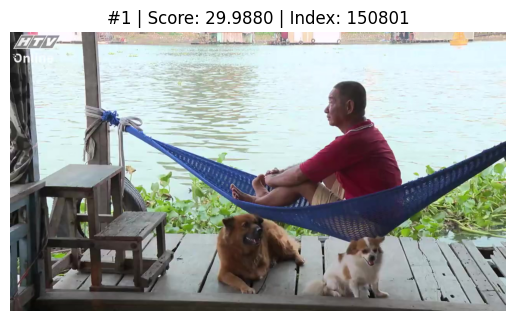

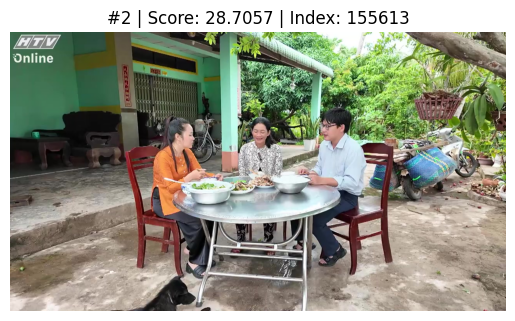

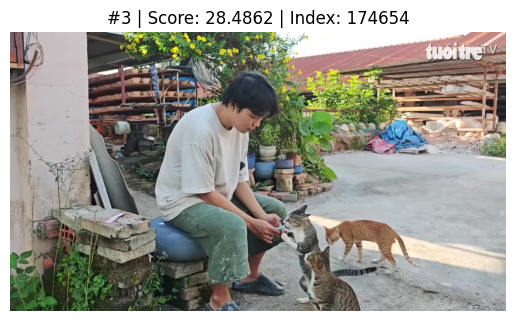

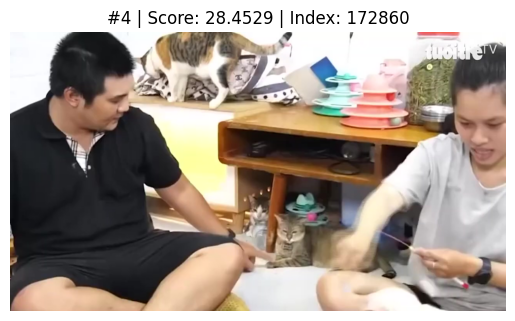

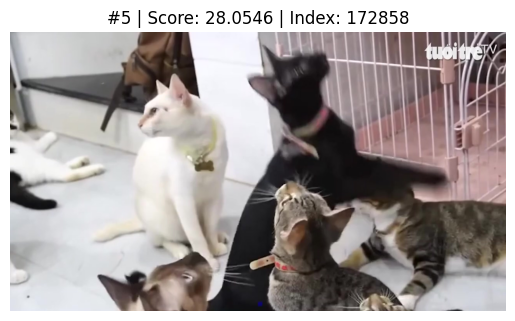

In [15]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 

text_input = input("Nhập truy text truy vấn")
text = clip.tokenize([text_input]).to(device)

with torch.no_grad():
    text_features = model.encode_text(text).float()

    # chuẩn hoá vector
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # tính độ tương đồng cosine
    similarity = (100.0 * image_features @ text_features.T)

top_k = 5    
values, indices = torch.topk(similarity.squeeze(), k=5)

print(f"Top {top_k} ảnh khớp với mô tả '{text_input}':")
for rank, (idx, score) in enumerate(zip(indices, values), 1):
    img_path = images[idx]   # đường dẫn ảnh
    print(f"#{rank}: {img_path} | Score: {score.item():.4f} | Index: {idx.item()}", img_index[idx])

    # hiển thị ảnh
    img = mpimg.imread(img_path)
    plt.figure()
    plt.imshow(img)
    plt.title(f"#{rank} | Score: {score.item():.4f} | Index: {idx.item()}")
    plt.axis("off")

plt.show()